# **Prova del 23 Ottobre 2025**

## Quesito 1


Giorgino ha comprato tanta uva a grappoli. Mentre si annoiava ha passato il tempo a contare il numero di acini d’uva per ciascun grappolo, trovano il seguente risultato (A = numero di acini, G = numero di grappoli con quel dato numero di acini)

| A | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| G | 1 | 1 | 10 | 31 | 53 | 92 | 124 | 90 | 61 | 20 | 16 | 1 |

*a) Graficare in un istogramma tali dati.*

*b) Calcolare uno stimatore non distorto di media e varianza.*

*c) Calcolare un intervallo di confidenza con livello di confidenza 95%.*

*d) Guardando l’istogramma che distribuzione ci viene in mente? Provare a graficare, sopra l’istogramma, una distribuzione teorica che ricalchi bene i dati.*


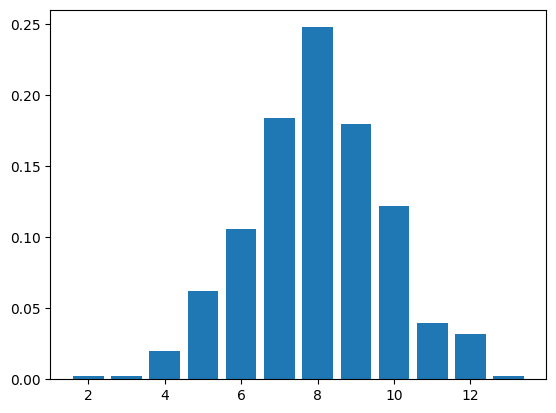

In [43]:
# Esercizio A
import matplotlib.pyplot as plt
import numpy as np

A = list(range(2,14))
G = np.array([1,1,10,31,53,92,124,90,61,20,16,1])

plt.bar(A, G/np.sum(G))
plt.show()

In [44]:
# Esercizio B

N = int(np.sum(G))
a_tot = 0

for i in range(len(A)):
    a_tot += G[i]*A[i]


## Uno stimatore non distorto della media, è la media campionaria.
mean = a_tot/N

print(f"La media è {mean}.")

def var_estimator(A, G, mean, n):
    sum = 0
    for i in range(len(G)):
        sum += G[i]*(A[i] - mean)**2

    return sum/(n-1)

    
## Uno stimatore non distorto della varianza
var = var_estimator(A, G, mean, N)
print(var)

La media è 7.998.
3.2044048096192386


In [45]:
# Esercizio C

from scipy.stats import t

# intervalli di confidenza della media al 95%
alpha = 0.05
I_lower = mean - var/np.sqrt(N)*t.ppf(1-alpha/2, N)
I_upper = mean + var/np.sqrt(N)*t.ppf(1-alpha/2, N)

print(f"L'intervallo di confidenza è [{I_lower}, {I_upper}]")

L'intervallo di confidenza è [7.716445156404675, 8.279554843595326]


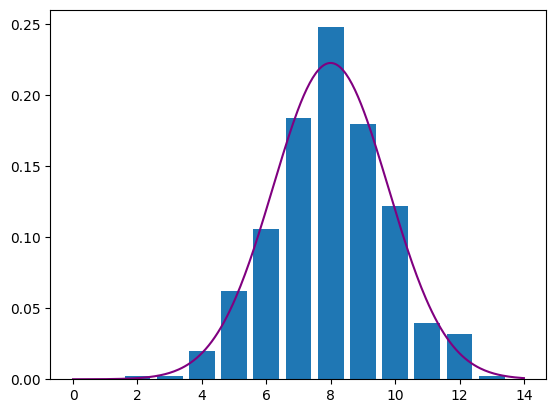

In [49]:
from scipy.stats import norm

# Esercizio D
k = np.linspace(0,14, 300)
A = list(range(2,14))
G = np.array([1,1,10,31,53,92,124,90,61,20,16,1])

plt.bar(A, G/np.sum(G))
plt.plot(k, norm.pdf(k, mean, np.sqrt(var)), 'purple')
plt.show()